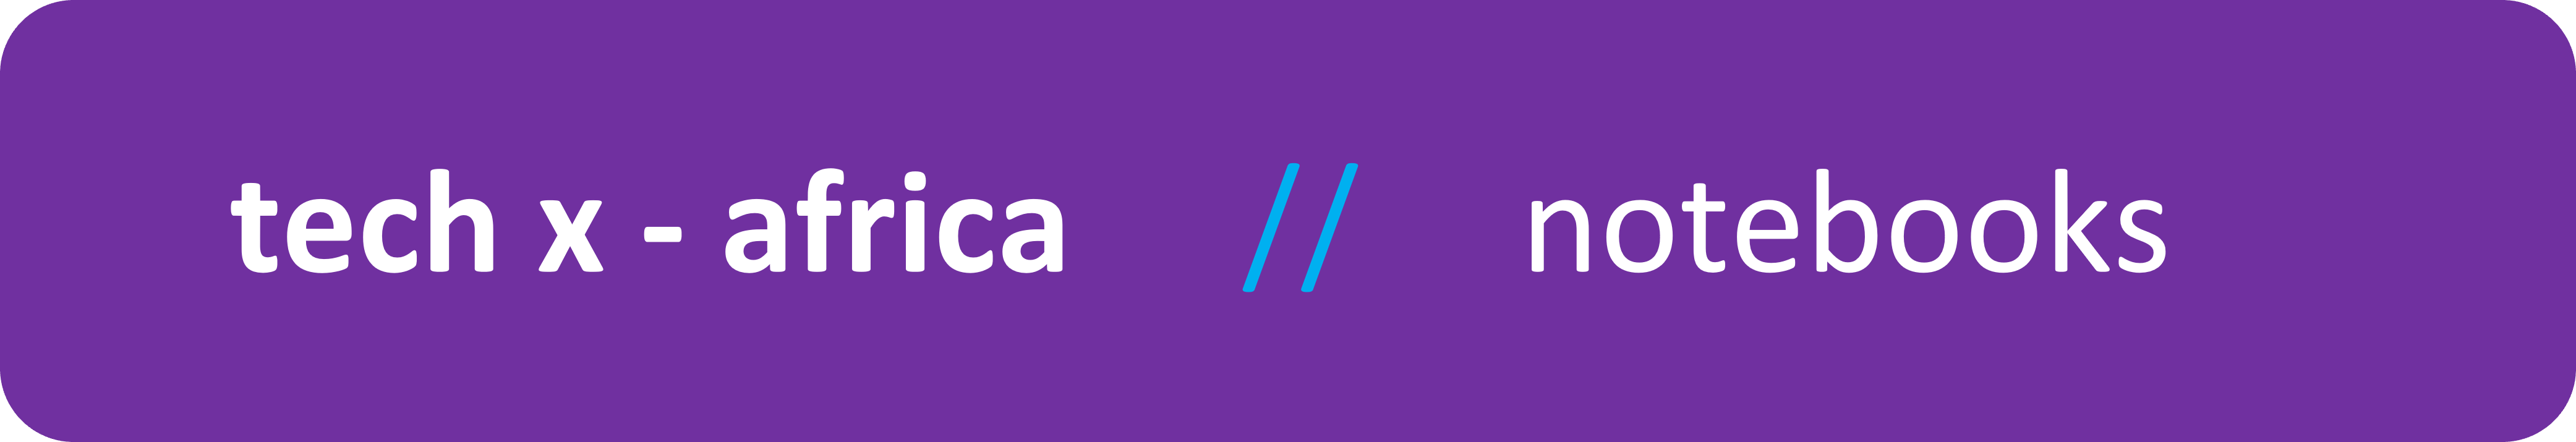

# Chat with your document using Gemini and LangChains 🦜️🔗



⚔️ I am your hosts, [Ngesa Marvin ](https://twitter.com/Ngesa254)!🐍


🏹 Our goal is to get you started with Germini API and LangChains

⚓  🗡️ 🏴‍☠️

Level: Intermediate (No previous experience necessary)

Here's what we will cover today:

1. How to use Gemini Pro API in LangChain 👨‍💻🧠💡
2. How to create a simple ChatBot using Gemini Pro with LangChain 💬🤖
3. How to interact with Images through Gemini Pro Vision API 🖼️👁️
6. How to create a document QnA System using Gemini Pro 📄🏋🏻‍♀️💪
5. Next steps... and more! 🏆✨ ➡️

### Install Required Packages

In [1]:
! pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv
!pip install langchain
! pip install pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.9/815.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.7 MB/s eta 0:00:00


### Import the necessary packages.

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

# Used to securely store your API key
from google.colab import userdata

In [3]:
#define a function to show responses generated by model
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [5]:
#retrieve the key
GOOGLE_API_KEY=userdata.get('gdsc_germini')

genai.configure(api_key=GOOGLE_API_KEY)

### Chat with Documents


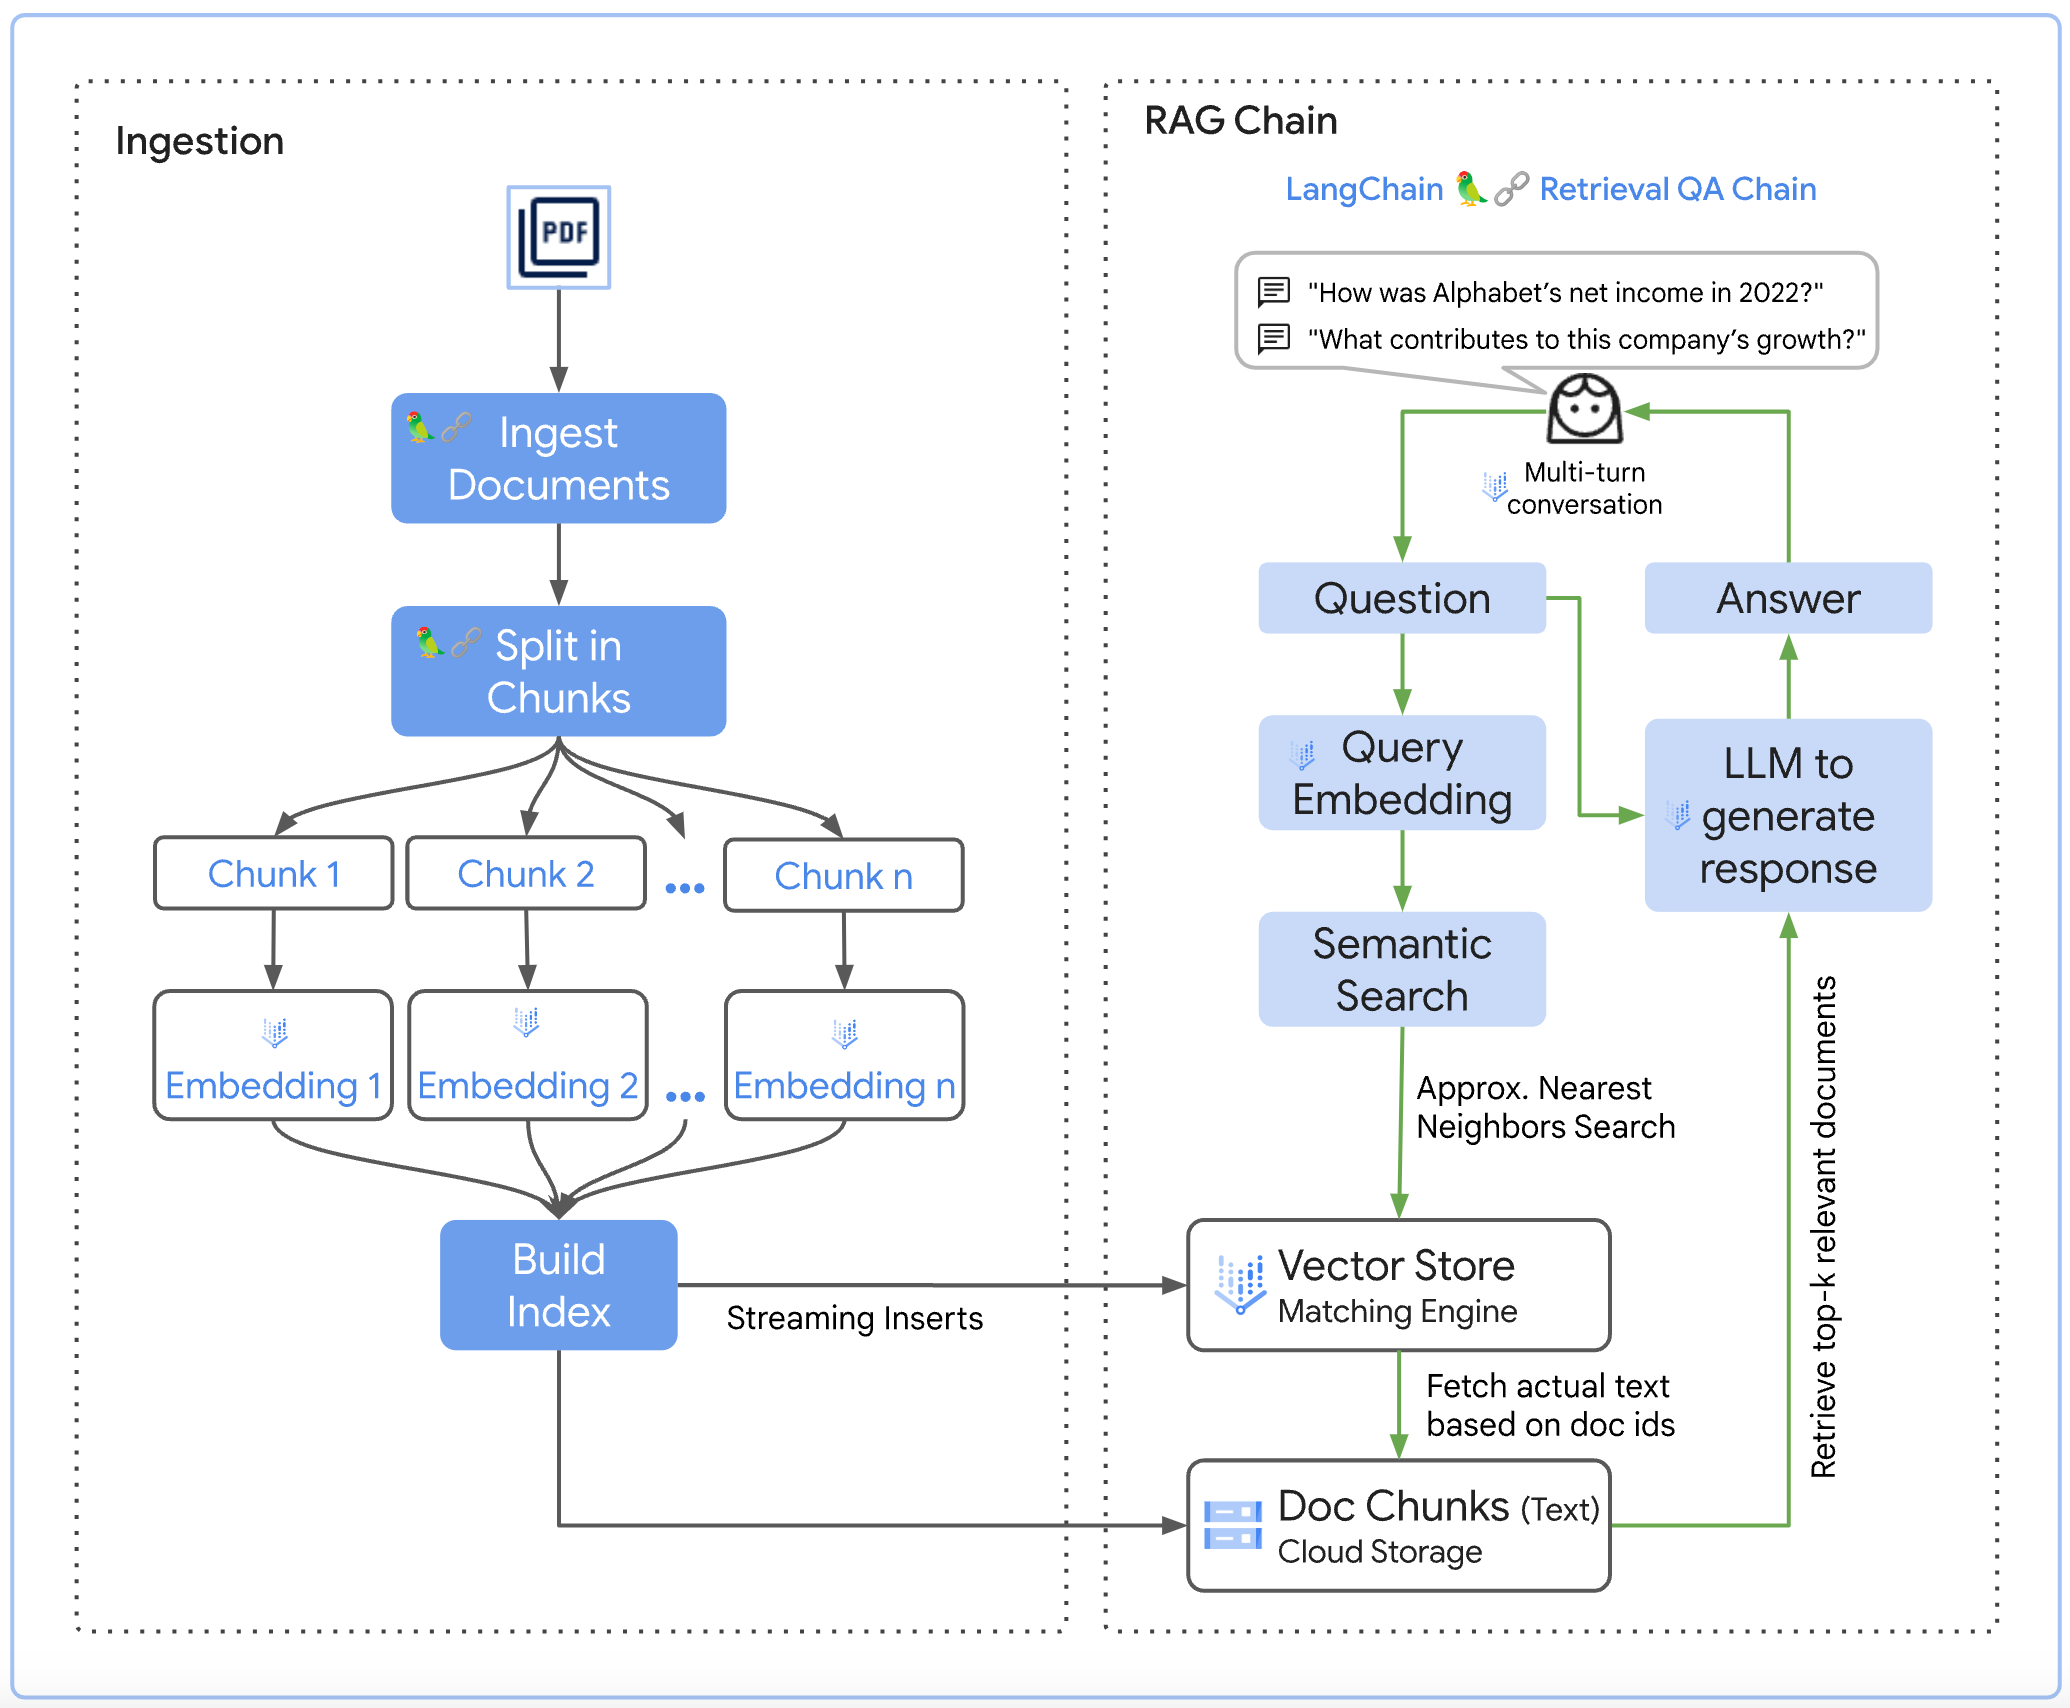


In [ ]:
# !sudo apt -y -qq install tesseract-ocr libtesseract-dev

# !sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

# !pip install langchain

In [6]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

### In Context Information Retreival




In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [8]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3, google_api_key=GOOGLE_API_KEY)

### Download the document

In [9]:
data_folder = p.cwd() / "data"
p(data_folder).mkdir(parents=True, exist_ok=True)

pdf_url = "https://kstatic.googleusercontent.com/files/f921919199e8543ce5ba3925e4ddbc6d104fe2e995c7f3338a6d88554890372ca442a6a23c9a17f94e06b143eba71d4652cbea529d4e2b6b5646da8f46736615#:~:text=The%20developer%20population%20rose%20by,contraction%20of%20the%20global%20economy"
pdf_file = str(p(data_folder, pdf_url.split("/")[-1]))

urllib.request.urlretrieve(pdf_url, pdf_file)

('/content/data/f921919199e8543ce5ba3925e4ddbc6d104fe2e995c7f3338a6d88554890372ca442a6a23c9a17f94e06b143eba71d4652cbea529d4e2b6b5646da8f46736615#:~:text=The%20developer%20population%20rose%20by,contraction%20of%20the%20global%20economy',
 <http.client.HTTPMessage at 0x7c6e901d8b50>)

### Extract text from the PDF

In [11]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 4.3 MB/s eta 0:00:00


In [17]:
pdf_loader = PyPDFLoader(pdf_file)
pages = pdf_loader.load_and_split()
print(pages[2].page_content)


Africa Developer Ecosystem 2021 3E v er y d a y , A fri c an b u s ine ss e s ar e h arne ss in g 
in g enui t y t o empo w er t heir c o mmuni t i e s. 
W e beli e v e t her e’ s no o ne be tt er t o s o lv e l oc al 
ch all en g e s t h an A fri c a’ s d e v el o per s, f o und er s, 
and en tr ep r eneur s. F o r t he s e c o nd y e ar in a r o w , 
G oogl e c o mmiss i o ne d A c c en tur e t o p r odu c e 
an aly s is t h a t r e sul t e d in t his r epo rt t o m ap A fri c a’ s 
d e v el o per l and s c ape. W e e xpand e d t his e di t i o n o f 
t he r epo rt t o inclu d e Y oY gr o wt h an aly s is, t e ch 
e c o sy s t em c o mpo nen t s, and k e y gr o wt h f a c t o r s. 
T he r e s e ar ch w a s c o ndu c t e d in 1 6 m ar k e t s and t he 
findin g s w er e e xtr apo l a t e d t o t he r e s t o f A fri c an 
c o un tri e s. 
In 20 2 1, C O VID- 19 c o n t inu e d t o sh ape t he 
o p po rtuni t i e s and ch all en g e s f a cin g d e v el o per s 
and t he t e ch c o mmu

In [19]:
context = "\n".join(str(p.page_content) for p in pages[:50])
print("The total words in the context: ", len(context))

The total words in the context:  50590


#### Prompt Design - In Context

In [20]:
prompt_template = """Answer the question as precise as possible using the provided context. If the answer is
                    not contained in the context, say "answer not available in context" \n\n
                    Context: \n {context}?\n
                    Question: \n {question} \n
                    Answer:
                  """

prompt = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

In [21]:
stuff_chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)


In [28]:
question = "What is the Total number of developers? Provide a detailed answer."



stuff_answer = stuff_chain(
    {"input_documents": pages[7:10], "question": question}, return_only_outputs=True
)

In [27]:
pprint(stuff_answer)


{'output_text': 'The total number of developers is 716,000.'}


In [31]:
question = "what are the key challenges facing developers"


stuff_answer = stuff_chain(
    {"input_documents": pages[0:50], "question": question}, return_only_outputs=True
)

In [32]:
pprint(stuff_answer)

{'output_text': 'The key challenges facing developers are: \n'
                '- Lack of training that accompanies remote work as well as '
                'poor internet, limiting success in work-from-home roles\n'
                '- Soft skills, including communication skills, are not well '
                'developed\n'
                '- Many junior developers face challenges in transitioning to '
                'mid-level and senior roles\n'
                '- The lack of access to major training opportunities as '
                'software developer training programs move to focus primarily '
                'on fostering senior talent\n'
                '- Women developers faced more challenges than men, given '
                'their more junior positions and the lack of childcare support '
                'during the Covid-19 pandemic'}


#### RAG Pipeline: Embedding + LLM

In [33]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [34]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [ ]:
# texts

In [37]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=GOOGLE_API_KEY)

In [38]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 29

In [39]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever()


In [40]:
question = "What are the key challenges facing developers"
docs = vector_index.get_relevant_documents(question)


In [41]:
docs

[Document(page_content='Africa Developer Ecosystem 2021 5 9G o v ernmen t sup po rt \nf o r d e v el o per s diff er s \nwi t hin t he fiv e gr o wt h \ntr aj e c t o r y t ype s.10 1. W i t h i t s m a tur e t e ch e c o sy s t em and t al en t poo l, t he c o n t inen t’ s \no nly M ain t ainin g  c o un tr y , So u t h A fri c a, h a s n ’ t m a d e bo l d \nr e g ul a t o r y s tri d e s t o f urt her bo l s t er t he t e ch e c o sy s t em. \n0 2. In A dv ancin g  c o un tri e s, t her e is a s tr o n g c o mmi t men t t o \nempo w erin g t e ch b u s ine ss e s and up skillin g y o u t h, e s pe ci ally \nin K en y a, \n03 . C ul t iv a t in g  c o un tri e s h a v e t he s tr o n g e s t g o v ernmen t sup po rt \nf o r t e chno l ogy; t he y’ r e f ocu s e d o n c a t chin g up wi t h a dv ancin g \nm ar k e t s and a ttr a c t in g in v e s t men t. \n04. E mer gin g  c o un tri e s’ g o v ernmen t s h a v en ’ t mod erniz e d f a s t \neno u gh, ho w e v er , t he y’ v e inc 

In [42]:
stuff_answer = stuff_chain(
    {"input_documents": docs, "question": question}, return_only_outputs=True
)

In [43]:
pprint(stuff_answer)


{'output_text': 'This question cannot be answered from the given context '
                'because it does not mention any challenges facing developers.'}


## Thank you 💖✨✨

Congratulations on finalizing Gemini Fundermentals Lesson 2

And thank you for your time and attention!

Questions? Comments? Ideas? Inspos?

*   Let me know [@ngesa254]( https://twitter.com/Ngesa254 ), [@techx_africa]( https://twitter.com/techx_africa)!

Keep Building!